###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2022 by D. Koehn and T. Meier, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Stochastik und Statistik eines 6-seitigen Würfel

In der Vorlesung hatte ich einige Grundbegriffe der Stochastik am Beispiel eines 6-seitigen Würfels eingeführt. In diesem Notebook soll das theoretische Wahrscheinlichkeitsmodell mit einem realen Würfelexperiment verglichen werden.

## Wahrscheinlichkeitsmodell für den 6-seitigen Würfel

Die mathematische Grundlage zur Beschreibung jedes stochastischen Modells ist ein
**Wahrscheinlichkeitsraum**, der sich aus drei Komponenten zusammensetzt ...

- ... dem **Ergebnisraum** $\Omega$, der alle möglichen Ergebnisse eines Zufallsexperiments enthält. Im Fall eines 6-seitigen Würfels also die Augenzahlen eines möglichen Wurfs $\Omega = \{1,2,3,4,5,6\}$.

- ... dem **Ereignisraum** $A \subseteq \Omega$, welcher die Ergebnisse des Zufallsexperiments enthält, für die wir uns interessieren. Im Fall des Würfels könnten wir uns für alle Ereignisse interessieren, bei denen eine 1 oder 6 gewürfelt wurde, also  $\Omega = \{1,6\}$

- ... dem **Wahrscheinlichkeitsmaß**, welches angibt, mit welcher Wahrscheinlichkeit ein Ereignis eintritt. Beim (ungezinkten) Würfel sollten die Wahrscheinlichkeiten für das würfeln einer Zahl gleichverteilt und lassen sich mit der [Laplace-Formel](https://de.wikipedia.org/wiki/Laplace-Formel) berechnen. Daraus folgt für das Wahrscheinlichkeitsmaß $W(A) = \{\frac{1}{6},\frac{1}{6}\}$

Schließlich muß man eine **Zufallsgröße** definieren, welche in diesem Fall die gewürfelte Augenzahl ist. 

Im nächsten Schritt, stellen wir die **Wahrscheinlichkeitsdichteverteilung $p$** dar, indem wir das Wahrscheinlichkeitsmaß über die Werte der Zufallsgröße für den Ergebnisraum plotten ...

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
import numpy as np        
import matplotlib.pyplot as plt

Definiere Werte der Zufallsgröße $X$ und der Wahrscheinlichkeitsdichteverteilung p 

In [3]:
# Definiere X und p
X = np.arange(1,7)
p = np.ones(6) * 1/6

print('X = ', X)
print('p = ', p)

X =  [1 2 3 4 5 6]
p =  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Plotte Wahrscheinlichkeitsdichteverteilung als Bar-Plot

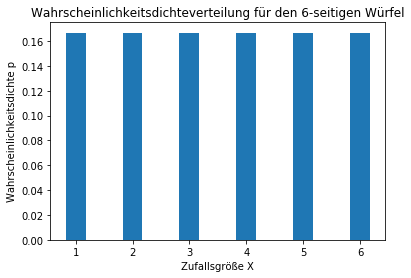

In [4]:
width = 0.35       # Breite der Bars
pp = plt.bar(X, p, width, label='p')
plt.ylabel('Wahrscheinlichkeitsdichte p')
plt.xlabel('Zufallsgröße X')
plt.title('Wahrscheinlichkeitsdichteverteilung für den 6-seitigen Würfel')
plt.show()

Wie man sieht, sind die Wahrscheinlichkeiten für das Würfeln einer Zahl gleichverteilt. Als nächstes können wir aus der Wahrscheinlichkeitsdichteverteilung die **Wahrscheinlichkeitsverteilung $P$** berechnen. Für den kontinuierlichen Fall wurde dazu über den Wahrscheinlichkeitsdichteverteilung integriert:

$P(s) = \int_{-\infty}^s p(s') ds'$

Im diskreten Fall, wie hier bei dem Würfel, wird das Integral durch eine Summe ersetzt:

$P_n = \sum_{i=1}^n p_i$ 

mit $n \in \{1,2,3,4,5,6\}$. In Python können wir die Summation einfach mit der NumPy-Funktion `cumsum` aus dem Vektor p berechnen:

In [5]:
# Wahrscheinlichkeitsverteilung P aus Wahrscheinlichkeitsdichteverteilung p
P = np.cumsum(p)
print('P = ', P)

P =  [0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


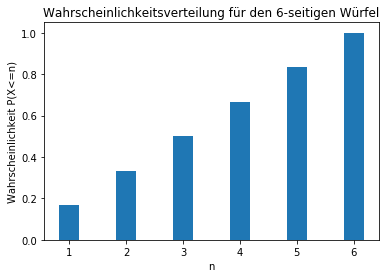

In [6]:
width = 0.35       # Breite der Bars
Pp = plt.bar(X, P, width, label='P')
plt.ylabel('Wahrscheinlichkeit P(X<=n)')
plt.xlabel('n')
plt.title('Wahrscheinlichkeitsverteilung für den 6-seitigen Würfel')
plt.show()

Schließlich können wir aus der Wahrscheinlichkeitsdichteverteilung $p$ den **Erwartungswert E[X]** der Zufallsgröße berechnen. Im kontinuierlichen Fall gilt:

$m_1 = E[X] = \int_{-\infty}^{\infty} s' p(s') ds'$

Im diskreten Fall ersetzen wir das Integral wieder durch eine Summe. Für den Würfel gilt:

$ E[X] = \sum_{i=1}^6 X_i p_i$

was wir einfach in Python realisieren können ...

In [7]:
E = np.sum(X*p)
print('E = ',E)

E =  3.5


An dieser Stelle nochmal der Hinweis, daß der Erwartungswert **nicht** dem arithmetischen Mittelwert entspricht. Der Erwartungswert basiert auf einem Wahrscheinlichkeitsmodells des Würfels. Dagegen basiert das arithmetische Mittel auf einer statistischen Auswertung einer Stichprobe eines realen Zufallsexperiments, z.B. indem man 1000x einen richtigen Würfel würfelt.

## Vergleich mit einem "richtigen" Würfel

Vergleichen wir einmal das Wahrscheinlichkeitsmodell des Würfels mit einem realen Zufallsexperiment, bei dem ich einen echten, analogen Würfel, 1026x gewürfelt hab. Das Ergebnis findet ihr in der ASCII Datei `wuerfel.txt`. Importieren wir mal die Daten ...

In [8]:
dice = np.loadtxt('data/wuerfel/wuerfel.txt', delimiter='\n', skiprows=0, unpack='False')

... und visualisieren diese mit der Plot-Funktion ...

Text(0.5, 1.0, 'Analoges Würfelexperiment')

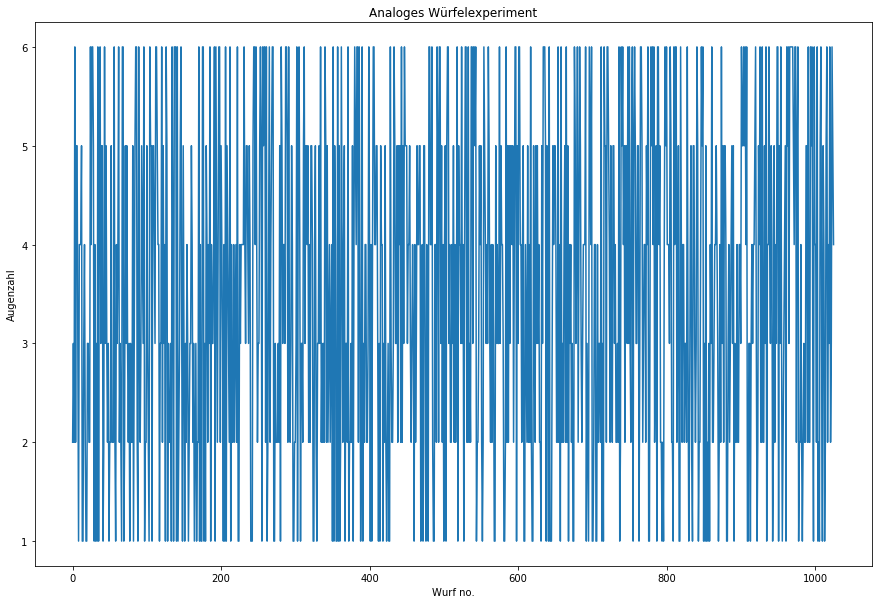

In [9]:
fig = plt.figure(figsize=(15., 10.))
plt.plot(dice)
plt.xlabel('Wurf no.')
plt.ylabel('Augenzahl')
plt.title('Analoges Würfelexperiment')

Sieht auf den ersten Blick ziemlich gleichverteilt aus. Berechnen wir mal die Wahrscheinlichkeitsdichteverteilung für das analoge Würfelexperiment.

In [10]:
# Berechne Wahrscheinlichkeitsdichteverteilung

n = np.size(dice) # Bestimme Anzahl der Würfe in dem Datensatz 

pdice = np.zeros(6)   # Initialisiere Wahrscheinlichkeitsdichteverteilung mit Null

for i in range(0,6):         # For-Schleife über alle Zufallsgrößen (Augenzahlen)    
    count = 0                # Zähler für das auftreten der Zufallsgröße i
    for j in range(1, n):  # For-Schleife über alle Würfe des Datensatzes
        
        # Falls Zufallsgröße i in dem Datensatz auftritt -> erhöhe count um 1
        if (int(dice[j]) == X[i]):
            count=count+1
    # Berechne Wahrscheinlichkeitsdichte für Zufallsgröße i
    pdice[i] = count / n
    
print('pdice = ',pdice)    

pdice =  [0.1539961  0.1871345  0.16179337 0.16374269 0.15984405 0.17251462]


Beim Vergleich zwischen der Wahrscheinlichkeitsdichteverteilung des theoretischen Wahrscheinlichkeitsmodells und der realen Durchführung des Zufallsexperiments sieht man einige kleinere Abweichungen.

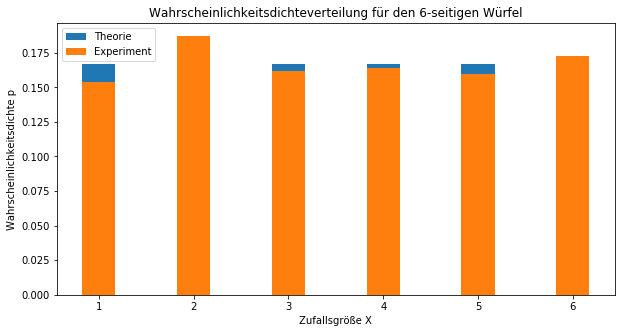

In [11]:
fig = plt.figure(figsize=(10., 5.))
pp = plt.bar(X, p, width, label='Theorie')
pp = plt.bar(X, pdice, width, label='Experiment')
plt.ylabel('Wahrscheinlichkeitsdichte p')
plt.xlabel('Zufallsgröße X')
plt.title('Wahrscheinlichkeitsdichteverteilung für den 6-seitigen Würfel')
plt.legend()
plt.show()

Entsprechend ergeben sich auch Unterschiede in der Wahrscheinlichkeitsverteilung ...

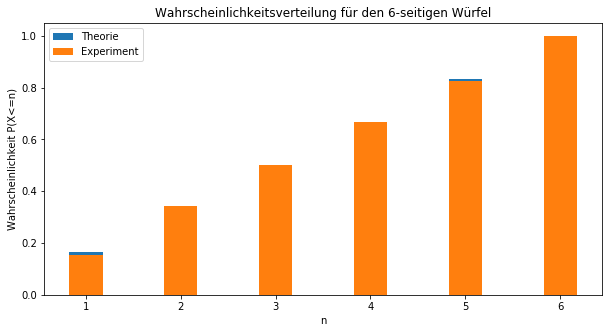

In [12]:
fig = plt.figure(figsize=(10., 5.))
# Wahrscheinlichkeitsverteilung P aus Wahrscheinlichkeitsdichteverteilung p
Pdice = np.cumsum(pdice)
Pp = plt.bar(X, P, width, label='Theorie')
Pdicep = plt.bar(X, Pdice, width, label='Experiment')
plt.ylabel('Wahrscheinlichkeit P(X<=n)')
plt.xlabel('n')
plt.title('Wahrscheinlichkeitsverteilung für den 6-seitigen Würfel')
plt.legend()
plt.show()

Deutlich erkennbar ist nun auch, daß der arithmetische Mittelwert $\bar{X}$ des Experiments ...

In [13]:
Xb = np.sum(X*pdice)
print('Xb = ',Xb)

Xb =  3.502923976608187


... von dem Erwartungswert $E$ des theoretischen Wahrscheinlichkeitsmodells abweicht ...

In [14]:
E = np.sum(X*p)
print('E = ',E)

E =  3.5


## Zusammenfassung:

- Mit einem simplen Würfel kann man grundlegende stochastische Größen wie Wahrscheinlichkeitsraum, Zufallsgröße, Wahrscheinlichkeits(dichte)verteilung und Erwartungswert anschaulich verstehen.

- Man sollte nicht vergessen, daß das stochastische Modell des Würfels auf bestimmten Annahmen beruht und deshalb in der Regel nicht mit der Auswertung der Stichprobe eines Zufallsexperiments mit einem realen Würfel übereinstimmt.

- Mehr Würfelthemen gibt 's hier [Dice on Numberphile](https://www.youtube.com/playlist?list=PLt5AfwLFPxWKdwptEcseLGWnCKRjIx55T)